In [109]:
import os

In [110]:
import pandas as pd

In [111]:
METHODS = ['default', 'ror','uniform','nri_uniform','var']
DATA_LBP_PATH = 'dataset/fish_data_lbp/resize/'

In [229]:
METHOD_INDEX = 4
df = pd.read_csv(os.path.join(DATA_LBP_PATH,METHODS[METHOD_INDEX],METHODS[METHOD_INDEX]+'_dense_radius_is_3.csv'), header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,1,A73EGS-P,1,0.059999,0.059698,0.011974,0.006135,0.002771,0.001502,0.001565,...,0.002327,0.001989,0.002264,0.001798,0.001946,0.001523,0.001650,0.002158,0.001650,0.001735
1,2,A73EGS-P,2,0.058002,0.607968,0.116776,0.067040,0.036290,0.022098,0.014379,...,0.000249,0.000124,0.000124,0.000124,0.000187,0.000249,0.000124,0.000062,0.000249,0.000311
2,3,A73EGS-P,3,0.053001,0.072352,0.004766,0.003524,0.002332,0.002459,0.001952,...,0.001293,0.001318,0.001496,0.001166,0.001192,0.001369,0.001039,0.001115,0.001115,0.000938
3,4,A73EGS-P,4,0.053998,0.214282,0.097966,0.028962,0.011739,0.006592,0.005503,...,0.001765,0.001709,0.002179,0.002367,0.002104,0.002010,0.002047,0.001972,0.001765,0.002085
4,5,A73EGS-P,5,0.059036,0.085115,0.007685,0.003033,0.001842,0.001451,0.001489,...,0.001396,0.000819,0.001117,0.001005,0.000726,0.001098,0.001042,0.000875,0.000875,0.000949
5,6,A73EGS-P,6,0.058001,0.158464,0.057606,0.011648,0.004182,0.002236,0.002208,...,0.000248,0.000207,0.000235,0.000152,0.000221,0.000304,0.000221,0.000386,0.000262,0.000235
6,7,A73EGS-P,7,0.056958,0.072078,0.014897,0.004611,0.002838,0.002091,0.001699,...,0.001568,0.001400,0.001531,0.001531,0.001848,0.001456,0.001755,0.001419,0.001437,0.001269
7,8,acanthaluteres_brownii,1,0.065948,0.023060,0.024380,0.020044,0.019714,0.018552,0.017185,...,0.000927,0.000911,0.000958,0.001100,0.000848,0.001068,0.000754,0.000943,0.000911,0.000943
8,9,acanthaluteres_brownii,2,0.054003,0.161579,0.048574,0.026664,0.022595,0.023206,0.022282,...,0.000551,0.000447,0.000462,0.000492,0.000626,0.000462,0.000238,0.000447,0.000462,0.000343
9,10,acanthaluteres_brownii,3,0.063999,0.132415,0.047638,0.032857,0.026028,0.021760,0.018165,...,0.000344,0.000509,0.000404,0.000300,0.000389,0.000524,0.000300,0.000374,0.000449,0.000329


In [230]:
# class_idx={}
# idx=0
# for i in df[1].unique():
#     class_idx[str(i)]=idx
#     idx+=1
# class_idx


In [231]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(df[1].unique())

LabelBinarizer()

In [232]:
new_class = lb.transform(df[1])
new_class.shape
# new_class=[]
# for i in df[1]:
    # print(lb.transform())
#     # new_class.append(class_idx[str(i)])
# df.insert(loc=2,value=new_class, column='class_idx')
# df.head()

(4415, 484)

In [233]:
index_input =[i for i in range(4,260)]
index_class = 'class_idx'
index_combine = index_input.copy()
index_combine.append(index_class)

In [234]:
df[index_input].to_numpy()

array([[5.96983351e-02, 1.19735144e-02, 6.13483954e-03, ...,
        2.15777115e-03, 1.65006029e-03, 1.73467877e-03],
       [6.07967631e-01, 1.16775599e-01, 6.70401494e-02, ...,
        6.22471211e-05, 2.48988484e-04, 3.11235605e-04],
       [7.23520763e-02, 4.76600923e-03, 3.52380470e-03, ...,
        1.11544897e-03, 1.11544897e-03, 9.37991178e-04],
       ...,
       [2.61103543e-01, 3.48115635e-02, 1.21924558e-02, ...,
        9.08127743e-04, 7.56773119e-04, 9.58579285e-04],
       [1.15031364e-03, 1.12335316e-02, 1.98429103e-02, ...,
        1.52776030e-03, 1.56370760e-03, 1.38397110e-03],
       [1.75741089e-01, 9.74916990e-02, 6.15673881e-02, ...,
        1.04012481e-03, 9.60115214e-04, 9.20110413e-04]])

In [235]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [236]:

# X_train, X_test, y_train, y_test = train_test_split(df[index_input].copy().to_numpy(), df[index_class].copy().to_numpy(), 
#                                                     stratify=df[index_class].copy().to_numpy(),random_state=1)

X_train, X_test, y_train, y_test = train_test_split(df[index_input].copy().to_numpy(), new_class, 
                                                    test_size=0.333,random_state=1)

In [237]:
X_train

array([[2.02234338e-01, 6.05232273e-02, 4.06607936e-02, ...,
        3.71399284e-04, 2.97119427e-04, 2.82263456e-04],
       [1.79058768e-01, 8.99189968e-02, 3.41409492e-02, ...,
        9.78562238e-04, 8.15468532e-04, 1.03292681e-03],
       [1.12376746e-01, 1.85555536e-02, 1.00516495e-02, ...,
        5.04321514e-04, 4.34759926e-04, 4.34759926e-04],
       ...,
       [9.25137846e-05, 1.36920401e-03, 3.33049624e-03, ...,
        1.59123709e-03, 1.55423158e-03, 1.25818747e-03],
       [1.97041598e-01, 4.58777594e-02, 2.36071482e-02, ...,
        5.10587175e-04, 6.15708064e-04, 5.55638985e-04],
       [6.15669678e-02, 1.08015918e-02, 7.01155960e-03, ...,
        2.29507506e-03, 1.91607184e-03, 2.16874066e-03]])

In [238]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [239]:
clf = MLPClassifier(hidden_layer_sizes=(200,220,238,204,146),solver='adam',random_state=None,n_iter_no_change=100, max_iter=1000, learning_rate_init=0.01).fit(X_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [240]:
import matplotlib.pyplot as plt


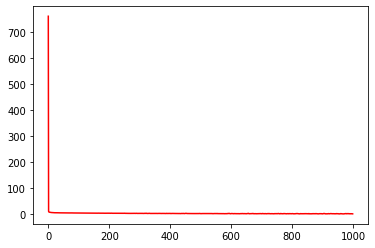

In [225]:
plt.plot(clf.loss_curve_, 'r')
plt.show()

In [226]:
clf.predict_proba(X_test[:1])

array([[2.11582424e-06, 2.80589532e-10, 2.86188807e-18, 1.57517664e-06,
        3.35956995e-06, 2.93486300e-14, 8.91766810e-08, 8.17122025e-09,
        2.44834580e-09, 1.08631614e-15, 2.74002523e-07, 2.15935170e-14,
        4.86841040e-29, 1.92182527e-31, 2.86826578e-10, 6.39830435e-12,
        2.34875814e-14, 4.40952176e-12, 5.47398140e-16, 1.26543755e-11,
        2.65982888e-14, 6.00404511e-08, 8.73617760e-09, 5.68681705e-06,
        1.94562143e-06, 2.72867432e-17, 5.49292208e-26, 4.40833604e-06,
        3.54472338e-27, 1.12015233e-31, 1.45546761e-15, 6.28490363e-07,
        6.99437031e-05, 1.57330680e-05, 8.93835484e-18, 1.80719578e-04,
        9.58395672e-16, 6.87526593e-04, 2.44417441e-13, 4.60380172e-12,
        1.74945842e-05, 1.17216350e-24, 5.22443246e-30, 2.96326167e-17,
        8.21745222e-05, 1.33119736e-08, 2.18524531e-22, 2.57462899e-16,
        4.41241907e-43, 3.14762279e-08, 1.77475961e-12, 1.83115046e-20,
        9.56541231e-11, 4.76114788e-16, 9.44697374e-05, 1.868704

In [227]:
y_test_pred = clf.predict(X_test[:, :])

In [228]:
clf.score(X_test, y_test)

0.017675050985723997

In [220]:
from sklearn.metrics import confusion_matrix

In [221]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
cm = confusion_matrix(lb.inverse_transform(y_test_pred), lb.inverse_transform(y_test))
cm

array([[3, 3, 1, ..., 1, 1, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [222]:
acc = accuracy(cm)
acc

0.010876954452753228